# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
import requests

In [2]:
train = requests.get('http://huang.eng.unt.edu/CSCE-5218/train.dat')
test = requests.get('http://huang.eng.unt.edu/CSCE-5218/test.dat')

In [3]:
with open('train.dat', 'wb') as f:
    for chunk in train.iter_content():
        f.write(chunk)

with open('test.dat', 'wb') as f:
    for chunk in test.iter_content():
        f.write(chunk)

In [4]:
# Take a peek at the datasets
!head train.dat
print()
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [5]:
# Function Test
import math

a = [1,2,2,1]
b = [1,1,2,2]

# dot product = (1 * 1) + (2 * 1) + (2 * 2) + (1 * 2) = 9

def dot_product(array1, array2):
    return sum(array1[i] * array2[i] for i in range(len(array1)))
    
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def output(weight, instance):
    return sigmoid(dot_product(weight, instance))

def predict(weight, instance):
    out = output(weight, instance)
    return 1 if out >= 0.5 else 0

print(dot_product(a,b), '\n')
print(output(a,b), '\n')
print(predict(a,b))

9 

0.9998766054240137 

1


In [6]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]        
    return data


def dot_product(array1, array2):
    # Calculate dot product of array1 and array2    
    '''
    Note: This function relies on array1 being the weights, as it only takes
    the dot product up to the last index of array1. Since the weights are one
    element shorter than the instances, this does not include the instance
    label (last column) in the calculation.
    '''
    return sum(array1[i] * array2[i] for i in range(len(array1))) 


def sigmoid(x):
    # Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    # Return the output of the model 
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    # Return the prediction of the model
    out = output(weights, instance)
    return 1 if out >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    # Initialize weights
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # Calculate "error" for single instance
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            # Adjust weights
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

### Alternative Perceptron Implementation

I am more familiar with the following implementation of the perceptron, and wanted to compare the two models' performances. I note in the comments below where I am running the alternative implementation.

In [7]:
def train_perceptron2(instances, lr, epochs):
    
    # Initialize weights
    weights = [0] * (len(instances[0])-1)
    
    for _ in range(epochs):
      #print(f'epoch {_}\n')
      j = 0
      for instance in instances:
        # Set y=1 for positive labels, y= -1 for negative labels
        # Activation (a) is the dot_product of weights and instance 
        y = 1 if instance[-1] == 1 else -1
        a = dot_product(weights, instance)
        # For each instance, if label and prediction disagree
        # (i.e. if ya <= 0), update weights as shown below
        if y*a <= 0:
          for i in range(0, len(weights)):
            weights[i] += y*instance[i]
        j += 1
    
    return weights

## Run it

In [8]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


In [9]:
# Run with alternative implementation

weights = train_perceptron2(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 72.0




### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the following code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

### Answer 1

The predict function assigns a label {1, 0} to each instance: if we used it to calculate output and (through this) error, we would get an error of 0 when the true label and the predicted label agreed, an error of 1 when the true label was 1 and the predicted label was 0, and an error of -1 when the true label was 0 and the predicted label was 1.

This is actually very close to how my alternative implementation of the perceptron works, where the weights are only updated on incorrect predictions. However, because the class implementation of the perceptron updates on every instance and uses the difference between the target label and the output to determine how much to adjust the weights, using the predictions to calculate error would not work here; when error is 0 (i.e. prediction and target agree) it would not update the weights at all, because the weight update is multiplied by the error. And even when error is non-zero, it still would not update the weights because either the term (output) or (1-output) would be equal to 0.

(Note: In the class model, the variable "error" doesn't actually seem to be calculating the true error of the model. I say this because later on we update weights using the code:
```
weights[i] += lr * error * output * (1-output) *instance[i]
```

Which would suggest that "error" is actually the negative derivative of error with respect to output.) 

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.


In [10]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

acc = []
i = -1

for lr in lr_array:
  acc.append([])
  i += 1
  j = -1
  for tr_size in tr_percent:
    acc[i].append([])
    j += 1
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      acc[i][j].append(accuracy)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

In [11]:
# Run with alternative implementation

# Learning rate doesn't factor into my implementation, so I leave it out of the training loop
acc2 = []

i = -1

for tr_size in tr_percent:
  acc2.append([])
  i += 1
  for epochs in num_epochs:
    size =  round(len(instances_tr)*tr_size/100)
    pre_instances = instances_tr[0:size]
    weights = train_perceptron2(pre_instances, lr, epochs)
    accuracy = get_accuracy(weights, instances_te)
    acc2[i].append(accuracy)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}; "
          f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5; Accuracy (test, 100 instances): 59.0
#tr: 20, epochs:  10; Accuracy (test, 100 instances): 60.0
#tr: 20, epochs:  20; Accuracy (test, 100 instances): 60.0
#tr: 20, epochs:  50; Accuracy (test, 100 instances): 60.0
#tr: 20, epochs: 100; Accuracy (test, 100 instances): 60.0
#tr: 40, epochs:   5; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10; Accuracy (test, 100 instances): 72.0
#tr: 40, epochs:  20; Accuracy (test, 100 instances): 69.0
#tr: 40, epochs:  50; Accuracy (test, 100 instances): 55.0
#tr: 40, epochs: 100; Accuracy (test, 100 instances): 55.0
#tr: 100, epochs:   5; Accuracy (test, 100 instances): 55.0
#tr: 100, epochs:  10; Accuracy (test, 100 instances): 57.0
#tr: 100, epochs:  20; Accuracy (test, 100 instances): 53.0
#tr: 100, epochs:  50; Accuracy (test, 100 instances): 60.0
#tr: 100, epochs: 100; Accuracy (test, 100 instances): 49.0
#tr: 200, epochs:   5; Accuracy (test, 100 instances): 51.0
#tr: 200, epochs:  10; Accuracy (test, 100 instanc

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?


In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 8.0]

### Answer 3

All three hyperparameters (learning rate, training size, number of epochs) interact with each other. For example, if we hold learning rate steady at 0.01 and average across different training sizes, we can see that on average accuracy grows with number of epochs trained. This makes sense, as the model has more chances to update its weights to an optimal value. However, when we split that up by different training sizes (still holding learning rate constant), we see that this isn't always true: with a training size of 20 or 40, the accuracy remains static across any number of epochs, presumably because iterating over the same 20 to 40 examples however many times doesn't bring the model enough new information to productively update its weights (in fact it's a little surprising that the model doesn't begin overfitting on its small training dataset and performing worse on the test dataset as a result). 

(68.0, 81.0)

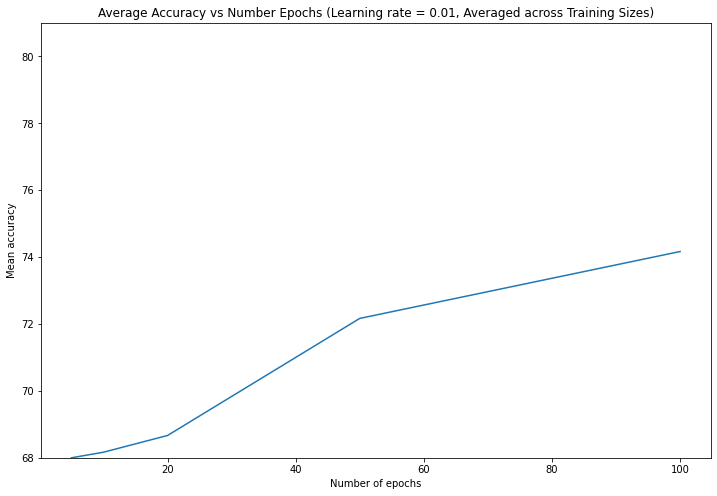

In [187]:
# Calculate mean accuracy per number epochs across different training sizes
acc = np.asarray(acc)
mean_epochs = np.mean(acc, axis=1)

# Plot mean accuracy vs number epochs
plt.plot(num_epochs, mean_epochs[1])
plt.title(f'Average Accuracy vs Number Epochs (Learning rate = 0.01, Averaged across Training Sizes)')
plt.xlabel('Number of epochs')
plt.ylabel('Mean accuracy')
plt.ylim(68, 81)

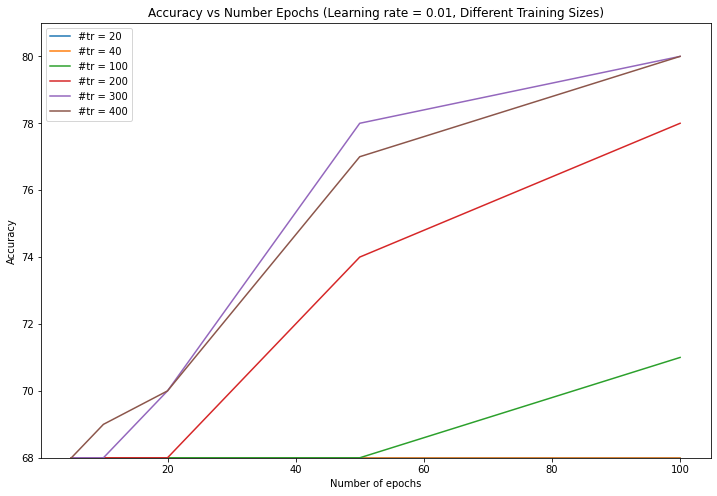

In [85]:
# For each training size, plot accuracy vs number epochs
for i, tr_size in enumerate(tr_percent):
    plt.plot(num_epochs, acc[1][i], label = f'#tr = {round(len(instances_tr)*tr_size/100)}')
    plt.title(f'Accuracy vs Number Epochs (Learning rate = 0.01, Different Training Sizes)')
    plt.xlabel('Number of epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.ylim(68, 81)

This behavior also changes with the learning rate. With a learning rate of 0.005, the averaged accuracy still displays the same general upward trend with number of epochs, but it does so much more slowly, as the individual weight updates are smaller and so the increase in accuracy over the same number of epochs is smaller. By contrast, with a learning rate of 0.05, we see the averaged accuracy rise more quickly with number of epochs, and then start to fall. This is presumably because the model reaches its training optimum more quickly and starts to overfit as it trains for more epochs.

(68.0, 81.0)

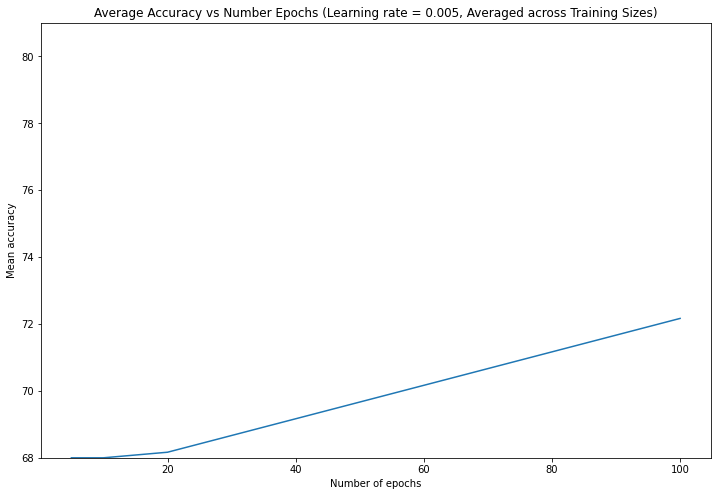

In [87]:
# Plot mean accuracy vs number epochs with learning rate = 0.005
plt.plot(num_epochs, mean_epochs[0])
plt.title(f'Average Accuracy vs Number Epochs (Learning rate = 0.005, Averaged across Training Sizes)')
plt.xlabel('Number of epochs')
plt.ylabel('Mean accuracy')
plt.ylim(68, 81)

(68.0, 81.0)

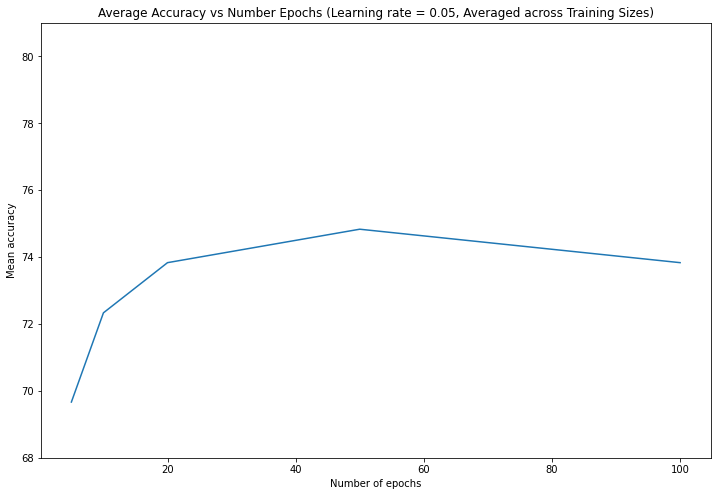

In [88]:
# Plot mean accuracy vs number epochs with learning rate = 0.05
plt.plot(num_epochs, mean_epochs[2])
plt.title(f'Average Accuracy vs Number Epochs (Learning rate = 0.05, Averaged across Training Sizes)')
plt.xlabel('Number of epochs')
plt.ylabel('Mean accuracy')
plt.ylim(68, 81)

Setting training size as our independent variable, while keeping learning rate steady and averaging across number of epochs, we find the same general upward trend: average accuracy increases as training size increases, though it seems to top out at about 75% of the training set. This is a bit surprising, as we would expect a larger training dataset to allow the model to generalize better to the unseen test set, as long as the training set has at least roughly the same distribution as the test dataset and is randomized.

(68.0, 81.0)

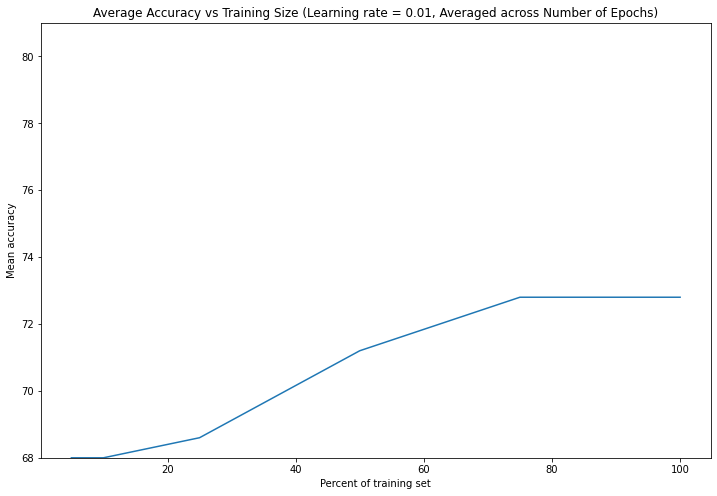

In [89]:
# Plot mean accuracy vs training size with learning rate = 0.01
plt.plot(tr_percent, mean_tr[1])
plt.title(f'Average Accuracy vs Training Size (Learning rate = 0.01, Averaged across Number of Epochs)')
plt.xlabel('Percent of training set')
plt.ylabel('Mean accuracy')
plt.ylim(68, 81)

Once again, splitting apart the average by number of epochs, we see that these hyperparameters are intertwined. If you only train for 5 epochs, it doesn't matter whether you use just part of the dataset or the entire thing, the weights still don't have time to significantly improve (at least at a learning rate of 0.01). If you train for 10 epochs, you see similar results, but it finally improves a bit when you iterate that many times over the entire training set. Strangely, for 20, 50, or 100 epochs, you hit peak accuracy training over 75% of the training set, and then either flatten out or regress (albeit only by 1%, and only on 50 epochs) when training on the entire dataset. We can't blame this on overfitting, because overfitting is a result of training too many epochs on the same-sized dataset, while in each of these cases we are keeping the number of epochs constant and increasing the size of the training dataset. It could just be that, by chance, the last 25% of the training dataset is less aligned to the test dataset, and so what the model learns on that portion of training dataset hurts its performance on the test dataset. I explore this possibility further in an additional section located at the bottom the homework.

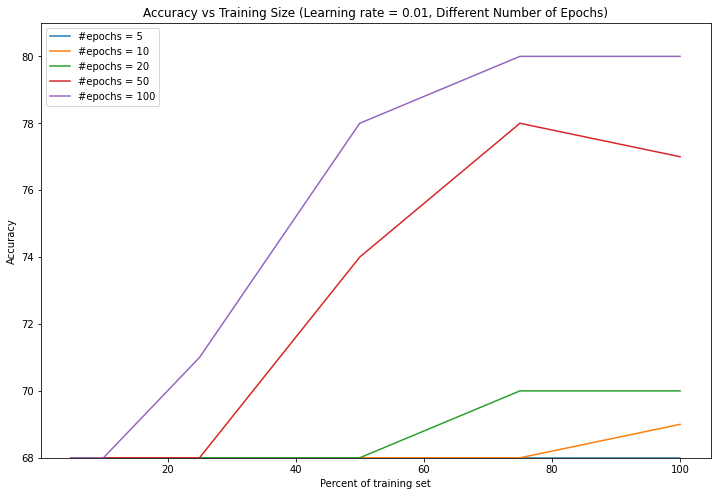

In [113]:
for i in range(len(acc[0][0])):
    tr = acc[1,:,i]
    plt.plot(tr_percent, tr, label = f'#epochs = {num_epochs[i]}')
    plt.title(f'Accuracy vs Training Size (Learning rate = 0.01, Different Number of Epochs)')
    plt.xlabel('Percent of training set')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.ylim(68, 81)

Again, when we look at average accuracy vs training size with different learning rates, we see basically the same pattern that accuracy increases with the size of the training set (though still only up to 75%). These patterns play out on a smaller (learning rate = 0.005) or larger (learning rate = 0.05) scale, as the weights are adjusted either more slowly or quickly. 

(68.0, 81.0)

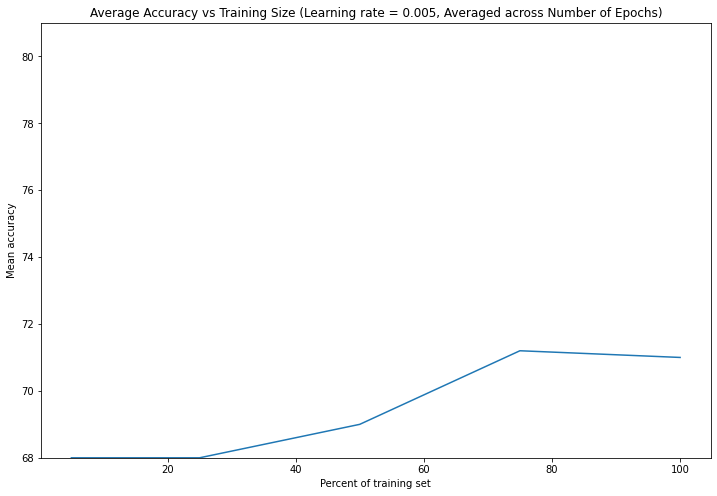

In [188]:
# Plot mean accuracy vs training size with learning rate = 0.005
plt.plot(tr_percent, mean_tr[0])
plt.title(f'Average Accuracy vs Training Size (Learning rate = 0.005, Averaged across Number of Epochs)')
plt.xlabel('Percent of training set')
plt.ylabel('Mean accuracy')
plt.ylim(68, 81)

(68.0, 81.0)

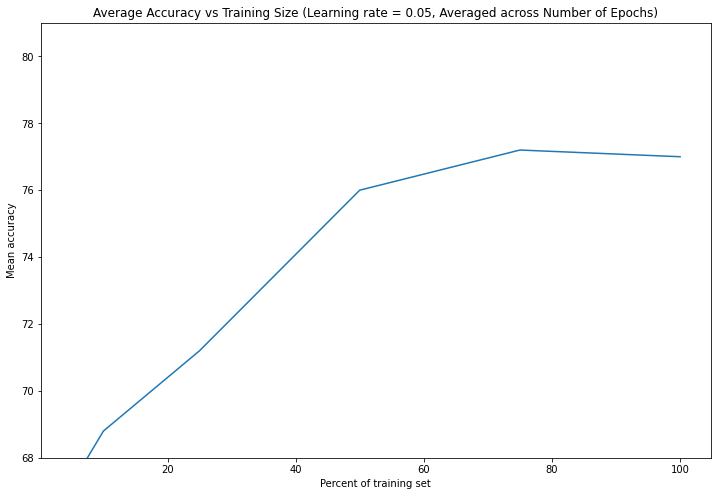

In [189]:
# Plot mean accuracy vs training size with learning rate = 0.05
plt.plot(tr_percent, mean_tr[2])
plt.title(f'Average Accuracy vs Training Size (Learning rate = 0.05, Averaged across Number of Epochs)')
plt.xlabel('Percent of training set')
plt.ylabel('Mean accuracy')
plt.ylim(68, 81)

In summary, accuracy generally improves with larger training sets and more epochs, though there are caps to both of these. At some point, increasing the number of epochs leads to overfitting, and accuracy on the unseen test dataset decreases. For another reason I'm still not clear about, at least on this dataset, accuracy also seems to top out when training on the first 75% of the data; I explore this question further below. As for learning rate, it mostly serves to either amplify or attenuate these trends, as the weights update themselves by larger or smaller steps. In some cases, too small a learning rate fails to converge within the number of epochs allotted for training because the changes to the weights are too small to arrive at the minimum; in others, too large a learning rate fails to converge because changes in the weights are too drastic and it ends up skipping over the minimum to another, higher loss. In response to the specific questions listed above:

A) Do you need to train with all the training dataset to get the highest accuracy with the test dataset?

Not for this dataset at least. I still think that, holding all either hyperparameters fixed, increasing the size of the training dataset *should* improve accuracy on the test dataset, so long as both datasets are roughly similar and the training dataset is randomized. I'm not sure why that doesn't seem to hold here, and explore the question further below.

B) How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?

#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0

#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0

Here this is justified by the fact that the learning rate on the first run is significantly higher, possibly allowing it to arrive at a minimal loss more quickly than the second run (though at an increased risk of overfitting). If the second run were allowed to continue for more epochs, or increased its own learning rate, presumably it would match or exceed the accuracy of the first (and indeed, looking at the accuracy across different hyperparameters, we see this is the case).

C) Can you get higher accuracy with additional hyperparameters (higher than 80.0)?

Yes. After playing around with the parameters (more or less randomly), I arrived at an accuracy of 81.0 with:

tr: 400, epochs: 100, learning rate: 1.0

Results shown below.

D) Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

No. At some point you will likely begin overfitting on the training data, which will decrease accuracy on the unseen test data.

In [174]:
weights = train_perceptron(instances_tr, 1, 100)
get_accuracy(weights, instances_te)

81.0

### Further Investigation into the effect of Training Data Size vs Accuracy

As mentioned above, it seems odd that increasing the size of the training set would cause the accuracy on the test set to stagnate or, stranger still, decrease. I posited that maybe something about the data in the last 25% of the training dataset was hurtin the model's ability to generalize to unseen datasets. To test this, I retrain the model, keeping the learning rate at 0.01 and iterating over different training sizes and numbers of epochs, but this time when I train it over parts of the training set, I start from the back and work my way forward. Interestingly, while there are some periods of stagnation earlier for these models (specifically between 50%-75% for the model trained for 20 epochs and between 10%-25% for the model trained for 100 epochs), all models (except for the one trained for 5 epochs) improve in their accuracy between 75% - 100%. The difference is, in this case, that last 25% is taken from the beginning of the training dataset rather than the end, which would seem to support the idea that something in the final 25% of the data is to blame for the drop in accuracy.

In [142]:
i = -1
new_acc = []
for tr_size in tr_percent:
  new_acc.append([])
  i += 1
  for epochs in num_epochs:
    size =  round(len(instances_tr)*tr_size/100)
    pre_instances = instances_tr[-size:]
    weights = train_perceptron(pre_instances, 0.01, epochs)
    accuracy = get_accuracy(weights, instances_te)
    new_acc[i].append(accuracy)

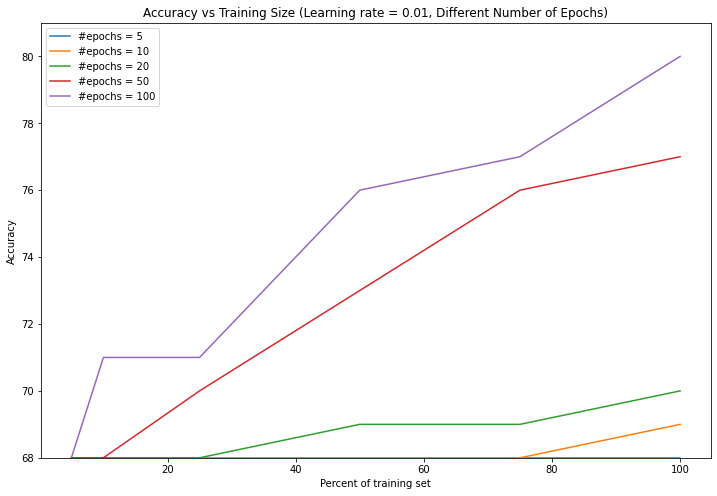

In [141]:
new_acc = np.asarray(new_acc)
for i in range(len(new_acc[0])):
    tr = new_acc[:,i]
    plt.plot(tr_percent, tr, label = f'#epochs = {num_epochs[i]}')
    plt.title(f'Accuracy vs Training Size (Learning rate = 0.01, Different Number of Epochs)')
    plt.xlabel('Percent of training set')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.ylim(68, 81)

To test this idea further, I tried two more experiments. First I tried dropping different segments of the training data (each segment amounting to 25% of the total data) and comparing accuracy between models thus trained. I then tried training the perceptron on just one quarter of the data each time, switching which quarter it was trained on and comparing those models. As can be seen below, when you drop the final quarter of the training data (as we do in the original setup), you receive the highest accuracy of 78%, whereas dropping any other quarter of the data results in a lower score of 76% or below. However, when you train it on just one quarter of the data, the final quarter isn't the worst-performing: instead the first is! All of these results are subject to change when adjusting different hyperparameters however (learning rate, number of epochs), so ultimately I am still unsure if there is something in the final quarter of this dataset specifically that causes the accuracy to stagnate or drop, or if there is some other cause I'm not thinking of, or if it is the product of random chance. 

In [186]:
a = instances_tr[100:]
b = instances_tr[:100] + instances_tr[200:]
c = instances_tr[:200] + instances_tr[300:]
d = instances_tr[:300]

for i, tr in enumerate([a,b,c,d]):
    weights = train_perceptron(tr, 0.01, 50)
    accuracy = get_accuracy(weights, instances_te)
    print(f'Drop quarter #{i+1}: {accuracy}')

Drop quarter #1: 76.0
Drop quarter #2: 75.0
Drop quarter #3: 74.0
Drop quarter #4: 78.0


In [180]:
a = instances_tr[:100]
b = instances_tr[100:200]
c = instances_tr[200:300]
d = instances_tr[300:]

for i, tr in enumerate([a,b,c,d]):
    weights = train_perceptron(tr, 0.01, 50)
    accuracy = get_accuracy(weights, instances_te)
    print(f'Train on quarter #{i+1}: {accuracy}')

Train on quarter #1: 68.0
Train on quarter #2: 71.0
Train on quarter #3: 71.0
Train on quarter #4: 70.0


### A quick note on the performance of my alternative perceptron implementation

My implementation of the perceptron, while it performed better with the initial hyperparameters of the assignment, proved much more unpredictable when tested under further sets of hyperparameters. The highest accuracy it achieves is 75.0, but there isn't much rhyme or reason as to why a certain set of hyperparameters will fare better or worse than any other. I suspect this is because its weight update algorithm only activates on incorrect predictions and is equal to the strength of the inputs of that instance. As a result, this perceptron updates much more erratically and much more drastically than the class implementation, and doesn't seem able to converge to an optimal solution. If the data were linearly seperable, it would eventually arrive at a set of weights that correctly identifies each data point, but failing this, it can get into cycles of updates that don't actually improve the overall accuracy of the model.